# <b> Overfitting and Underfitting
    
The IMDB dataset comes packaged with TensorFlow. It has already been preprocessed such that the reviews (sequences of words) have been converted to sequences of integers, where each integer represents a specific word in a dictionary.

#### <b> Imports

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)


1.14.0


#### <b> Load Data

In [3]:
num_words = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words = num_words)

#### <b> Prepare Data

In [4]:
'''
Here we're use Multi-Hot Enconde rather than One-Hot, it will 
overfit in training set to examplify
'''
def MultiHotSequences(sequences, dimension):
    # Create all zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        # Set specific indices of results[i] to 1s
        results[i, word_indices] = 1.0
    return results

In [5]:
train_data = MultiHotSequences(train_data, dimension = num_words)
test_data = MultiHotSequences(test_data, dimension = num_words)

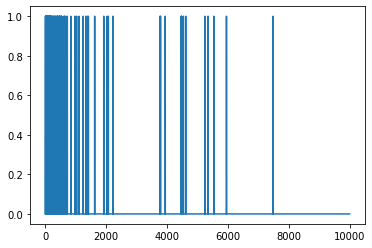

In [8]:
plt.plot(train_data[0])

#### <b> Demonstrate Overfitting
    
The simplest way to prevent overfitting is to reduce the size of the model, i.e. the number of learnable parameters in the model (which is determined by the number of layers and the number of units per layer). In deep learning, the number of learnable parameters in a model is often referred to as the model's "capacity". Intuitively, a model with more parameters will have more "memorization capacity" and therefore will be able to easily learn a perfect dictionary-like mapping between training samples and their targets, a mapping without any generalization power, but this would be useless when making predictions on previously unseen data.

Always keep this in mind: deep learning models tend to be good at fitting to the training data, but the real challenge is generalization, not fitting.

On the other hand, if the network has limited memorization resources, it will not be able to learn the mapping as easily. To minimize its loss, it will have to learn compressed representations that have more predictive power. At the same time, if you make your model too small, it will have difficulty fitting to the training data. There is a balance between "too much capacity" and "not enough capacity".

Unfortunately, there is no magical formula to determine the right size or architecture of your model (in terms of the number of layers, or the right size for each layer). You will have to experiment using a series of different architectures.

To find an appropriate model size, it's best to start with relatively few layers and parameters, then begin increasing the size of the layers or adding new layers until you see diminishing returns on the validation loss. Let's try this on our movie review classification network.

We'll create a simple model using only Dense layers as a baseline, then create smaller and larger versions, and compare them.

#### <b> Creating a Baseline Model

In [10]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation = tf.nn.relu, input_shape = (num_words,)),
    keras.layers.Dense(16, activation = tf.nn.relu),
    keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

In [12]:
baseline_model.compile(optimizer='adam',
                      loss = 'binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

In [13]:
baseline_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [14]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.4859 - acc: 0.8057 - binary_crossentropy: 0.4859 - val_loss: 0.3368 - val_acc: 0.8756 - val_binary_crossentropy: 0.3368
Epoch 2/20
25000/25000 - 2s - loss: 0.2504 - acc: 0.9113 - binary_crossentropy: 0.2504 - val_loss: 0.2850 - val_acc: 0.8879 - val_binary_crossentropy: 0.2850
Epoch 3/20
25000/25000 - 2s - loss: 0.1832 - acc: 0.9351 - binary_crossentropy: 0.1832 - val_loss: 0.2925 - val_acc: 0.8833 - val_binary_crossentropy: 0.2925
Epoch 4/20
25000/25000 - 2s - loss: 0.1482 - acc: 0.9487 - binary_crossentropy: 0.1482 - val_loss: 0.3241 - val_acc: 0.8737 - val_binary_crossentropy: 0.3241
Epoch 5/20
25000/25000 - 2s - loss: 0.1212 - acc: 0.9596 - binary_crossentropy: 0.1212 - val_loss: 0.3391 - val_acc: 0.8748 - val_binary_crossentropy: 0.3391
Epoch 6/20
25000/25000 - 2s - loss: 0.0992 - acc: 0.9693 - binary_crossentropy: 0.0992 - val_loss: 0.3704 - val_acc: 0.8700 - val_binary_crossentropy: 0.3704
Ep

#### <b> Creating a Smaller Model

In [17]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation = tf.nn.relu, input_shape = (num_words,)),
    keras.layers.Dense(4, activation = tf.nn.relu),
    keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

In [18]:
smaller_model.compile(optimizer='adam',
                      loss = 'binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

In [19]:
smaller_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [22]:
smaller_history = smaller_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.5381 - acc: 0.7908 - binary_crossentropy: 0.5381 - val_loss: 0.4225 - val_acc: 0.8582 - val_binary_crossentropy: 0.4225
Epoch 2/20
25000/25000 - 2s - loss: 0.3345 - acc: 0.8934 - binary_crossentropy: 0.3345 - val_loss: 0.3293 - val_acc: 0.8792 - val_binary_crossentropy: 0.3293
Epoch 3/20
25000/25000 - 2s - loss: 0.2542 - acc: 0.9153 - binary_crossentropy: 0.2542 - val_loss: 0.2966 - val_acc: 0.8868 - val_binary_crossentropy: 0.2966
Epoch 4/20
25000/25000 - 2s - loss: 0.2109 - acc: 0.9300 - binary_crossentropy: 0.2109 - val_loss: 0.2861 - val_acc: 0.8870 - val_binary_crossentropy: 0.2861
Epoch 5/20
25000/25000 - 2s - loss: 0.1814 - acc: 0.9398 - binary_crossentropy: 0.1814 - val_loss: 0.2858 - val_acc: 0.8862 - val_binary_crossentropy: 0.2858
Epoch 6/20
25000/25000 - 2s - loss: 0.1598 - acc: 0.9485 - binary_crossentropy: 0.1598 - val_loss: 0.2905 - val_acc: 0.8847 - val_binary_crossentropy: 0.2905
Ep

#### <b> Creating a Bigger Model

In [23]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation = tf.nn.relu, input_shape = (num_words,)),
    keras.layers.Dense(512, activation = tf.nn.relu),
    keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

In [24]:
bigger_model.compile(optimizer='adam',
                      loss = 'binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

In [25]:
bigger_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [26]:
bigger_history = bigger_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.3647 - acc: 0.8381 - binary_crossentropy: 0.3647 - val_loss: 0.2969 - val_acc: 0.8784 - val_binary_crossentropy: 0.2969
Epoch 2/20
25000/25000 - 5s - loss: 0.1527 - acc: 0.9451 - binary_crossentropy: 0.1527 - val_loss: 0.3280 - val_acc: 0.8736 - val_binary_crossentropy: 0.3280
Epoch 3/20
25000/25000 - 5s - loss: 0.0595 - acc: 0.9815 - binary_crossentropy: 0.0595 - val_loss: 0.4296 - val_acc: 0.8684 - val_binary_crossentropy: 0.4296
Epoch 4/20
25000/25000 - 5s - loss: 0.0101 - acc: 0.9982 - binary_crossentropy: 0.0101 - val_loss: 0.5502 - val_acc: 0.8702 - val_binary_crossentropy: 0.5502
Epoch 5/20
25000/25000 - 6s - loss: 0.0018 - acc: 1.0000 - binary_crossentropy: 0.0018 - val_loss: 0.6437 - val_acc: 0.8724 - val_binary_crossentropy: 0.6437
Epoch 6/20
25000/25000 - 6s - loss: 3.2409e-04 - acc: 1.0000 - binary_crossentropy: 3.2409e-04 - val_loss: 0.6980 - val_acc: 0.8726 - val_binary_crossentropy: 0

#### <b> Plot Data 

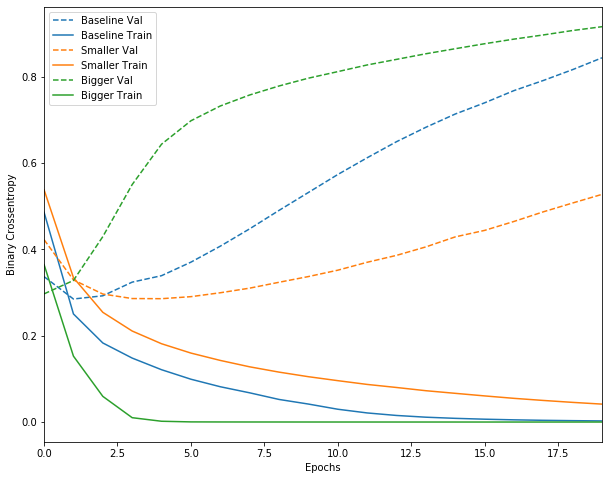

In [37]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(10,8))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])


The large datasets explodes on overfitting afters the first epochs

#### <b> Techniques to Prevent Overfitting

Weight Regularization: forcing its weights only to take small values, which makes the distribution of weight values more "regular"

* L1 regularization: the cost added is proportional to the absolute value of weights coefficients
* L2 regularization: the cost added is proportional to the square of the value of weights coefficients (also called weight decay)

In [38]:
L2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer = keras.regularizers.l2(0.001),
                      activation = tf.nn.relu, input_shape = (num_words,)),
    keras.layers.Dense(16, kernel_regularizer = keras.regularizers.l2(0.001),
                      activation = tf.nn.relu),
    keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

In [39]:
L2_model.compile(optimizer = 'adam',
                loss = 'binary_crossentropy', 
                metrics = ['accuracy', 'binary_crossentropy'])

In [40]:
L2_model_history = L2_model.fit(train_data, train_labels,
                               epochs = 20,
                               batch_size = 512,
                               validation_data = (test_data, test_labels),
                               verbose = 2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5237 - acc: 0.7988 - binary_crossentropy: 0.4828 - val_loss: 0.3776 - val_acc: 0.8746 - val_binary_crossentropy: 0.3355
Epoch 2/20
25000/25000 - 2s - loss: 0.2979 - acc: 0.9076 - binary_crossentropy: 0.2519 - val_loss: 0.3358 - val_acc: 0.8847 - val_binary_crossentropy: 0.2870
Epoch 3/20
25000/25000 - 2s - loss: 0.2478 - acc: 0.9312 - binary_crossentropy: 0.1967 - val_loss: 0.3436 - val_acc: 0.8823 - val_binary_crossentropy: 0.2907
Epoch 4/20
25000/25000 - 2s - loss: 0.2236 - acc: 0.9429 - binary_crossentropy: 0.1689 - val_loss: 0.3494 - val_acc: 0.8832 - val_binary_crossentropy: 0.2936
Epoch 5/20
25000/25000 - 2s - loss: 0.2102 - acc: 0.9474 - binary_crossentropy: 0.1530 - val_loss: 0.3637 - val_acc: 0.8796 - val_binary_crossentropy: 0.3057
Epoch 6/20
25000/25000 - 2s - loss: 0.1987 - acc: 0.9531 - binary_crossentropy: 0.1397 - val_loss: 0.3774 - val_acc: 0.8768 - val_binary_crossentropy: 0.3179
Ep

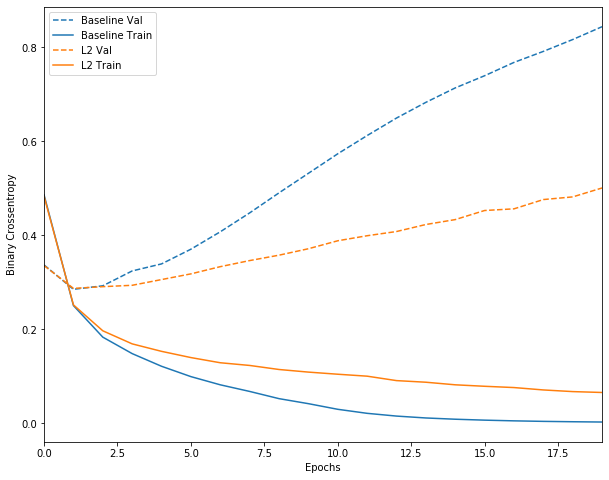

In [41]:
plot_history([('baseline', baseline_history),
             ('l2', L2_model_history)])

 L2 regularized model has become much more resistant to overfitting than the baseline model, even though 
    both models have the same number of parameters.

#### <b> Dropout

Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Hinton and his students at the University of Toronto. Dropout, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training. Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1]. The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5. At test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

In [42]:
dropout_model = keras.models.Sequential([
    keras.layers.Dense(16, activation = tf.nn.relu, input_shape = (num_words,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation = tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

In [43]:
dropout_model.compile(optimizer = 'adam',
                     loss = 'binary_crossentropy',
                     metrics = ['accuracy', 'binary_crossentropy'])

In [44]:
dropout_model_history = dropout_model.fit(train_data, train_labels,
                                         epochs = 20,
                                         batch_size = 512,
                                         validation_data=(test_data, test_labels),
                                         verbose = 2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.6455 - acc: 0.6175 - binary_crossentropy: 0.6455 - val_loss: 0.5405 - val_acc: 0.8422 - val_binary_crossentropy: 0.5405
Epoch 2/20
25000/25000 - 2s - loss: 0.5126 - acc: 0.7935 - binary_crossentropy: 0.5126 - val_loss: 0.4092 - val_acc: 0.8767 - val_binary_crossentropy: 0.4092
Epoch 3/20
25000/25000 - 2s - loss: 0.4066 - acc: 0.8630 - binary_crossentropy: 0.4066 - val_loss: 0.3389 - val_acc: 0.8847 - val_binary_crossentropy: 0.3389
Epoch 4/20
25000/25000 - 2s - loss: 0.3374 - acc: 0.8971 - binary_crossentropy: 0.3374 - val_loss: 0.3092 - val_acc: 0.8872 - val_binary_crossentropy: 0.3092
Epoch 5/20
25000/25000 - 2s - loss: 0.2892 - acc: 0.9144 - binary_crossentropy: 0.2892 - val_loss: 0.3069 - val_acc: 0.8864 - val_binary_crossentropy: 0.3069
Epoch 6/20
25000/25000 - 2s - loss: 0.2571 - acc: 0.9220 - binary_crossentropy: 0.2571 - val_loss: 0.2971 - val_acc: 0.8850 - val_binary_crossentropy: 0.2971
Ep

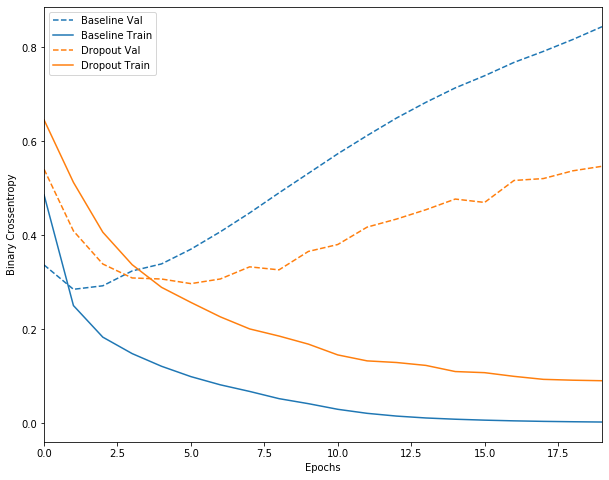

In [45]:
plot_history([('baseline', baseline_history),
             ('dropout', dropout_model_history)])

Adding dropout is a clear improvement over the baseline model.

To recap: here the most common ways to prevent overfitting in neural networks:

    Get more training data.
    Reduce the capacity of the network.
    Add weight regularization.
    Add dropout.

And two important approaches not covered in this guide are data-augmentation and batch normalization.

